In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from torchvision import transforms
from torchvision.utils import make_grid
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt
import numpy as np

from tqdm.auto import tqdm

from IPython.display import clear_output

import os

In [2]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28), title=""):
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.title(title)
    plt.show()

In [3]:
class Generator(nn.Module):
    def __init__(self, n_dim=10, h_dim=128, im_dim=784):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            self.gen_block(n_dim, h_dim),
            self.gen_block(h_dim, h_dim*2),
            self.gen_block(h_dim*2, h_dim*4),
            self.gen_block(h_dim*4, h_dim*8),
            nn.Linear(h_dim*8, im_dim),
            nn.Sigmoid()
        )
    
    def gen_block(self, in_dim, out_dim):
        return nn.Sequential(
            nn.Linear(in_dim, out_dim),
            nn.BatchNorm1d(out_dim),
            nn.ReLU(inplace=True)
        )

    def forward(self, noise):
        return self.gen(noise)

    def get_gen(self):
        return self.gen

In [4]:
class Discriminator(nn.Module):
    def __init__(self, h_dim=128, im_dim=784):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            self.disc_block(im_dim, h_dim*4),
            self.disc_block(h_dim*4, h_dim*2),
            self.disc_block(h_dim*2, h_dim),
            nn.Linear(h_dim, 1)
        )
    
    def disc_block(self, in_dim, out_dim):
        return nn.Sequential(
            nn.Linear(in_dim, out_dim),
            # nn.BatchNorm1d(out_dim),
            nn.LeakyReLU(negative_slope = 0.2, inplace = True)
        )

    def forward(self, image):
        return self.disc(image)

    def get_disc(self):
        return self.disc

In [5]:
def get_noise(batch_size, n_dim, device):
    return torch.randn(batch_size, n_dim, device=device)

def get_disc_loss(gen, disc, criterion, real, batch_size, n_dim, device):
    fake = gen(get_noise(batch_size, n_dim, device=device)).detach()
    y_fake = disc(fake)
    y_real = disc(real)
    fake_loss = criterion(y_fake, torch.zeros_like(y_fake))
    real_loss = criterion(y_real, torch.ones_like(y_real))
    disc_loss = ( fake_loss + real_loss ) / 2.0
    return disc_loss

def get_gen_loss(gen, disc, criterion, batch_size, n_dim, device):
    fake = gen(get_noise(batch_size, n_dim, device=device))
    y_fake = disc(fake)
    gen_loss = criterion(y_fake, torch.ones_like(y_fake))
    return gen_loss

In [6]:
criterion = nn.BCEWithLogitsLoss()
n_dim = 64
batch_size = 128
lr = 0.00001
display_step = 5000


dataloader = DataLoader(MNIST('.', download=True, transform=transforms.ToTensor()),
                        batch_size=batch_size, shuffle=True)

device = 'cpu'

In [7]:
cur_step = 0
epoch_step = 0
sum_gen_loss = 0
sum_disc_loss = 0
mean_gen_loss = 0
mean_disc_loss = 0

gen = Generator(n_dim=n_dim).to(device)
disc = Discriminator().to(device)

gen_opt = optim.Adam(gen.parameters(), lr)
disc_opt = optim.Adam(disc.parameters(), lr)

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 0: Generator loss: 1.3334327880253416, discriminator loss: 0.42398652205589227


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1: Generator loss: 1.6834455001582977, discriminator loss: 0.2986794790860686


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 2: Generator loss: 1.9624158128746536, discriminator loss: 0.1812015050319212


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 3: Generator loss: 1.7912077913914661, discriminator loss: 0.20680096532617295


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 4: Generator loss: 1.7305389108942515, discriminator loss: 0.19893650589848377


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 5: Generator loss: 1.8829079319927484, discriminator loss: 0.18083741009108292


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 6: Generator loss: 2.166866666218365, discriminator loss: 0.15784363731392412


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 7: Generator loss: 2.595055787039718, discriminator loss: 0.11612006048086101


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 8: Generator loss: 3.0951490681817027, discriminator loss: 0.0913095893953909


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 9: Generator loss: 3.2579955958100015, discriminator loss: 0.10223386396191267


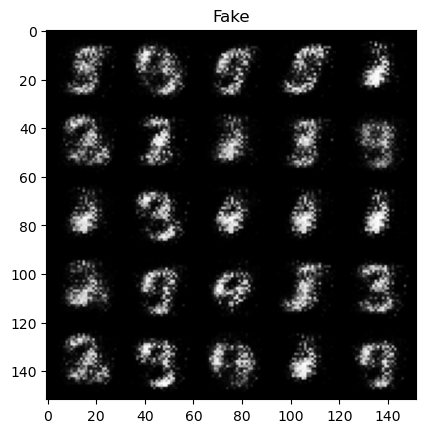

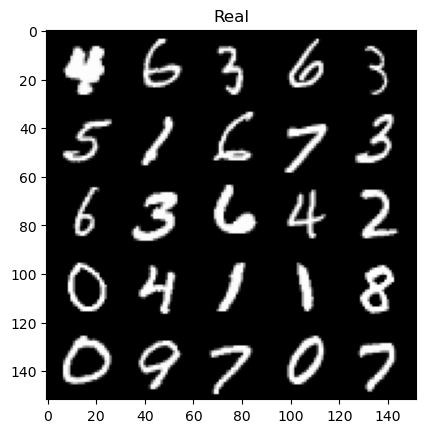

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 10: Generator loss: 3.3692136593719026, discriminator loss: 0.07813169408454569


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 11: Generator loss: 3.6981070417839326, discriminator loss: 0.06298016612209491


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 12: Generator loss: 3.8486261698228716, discriminator loss: 0.05911940157508799


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 13: Generator loss: 4.03561508985979, discriminator loss: 0.05804308957414332


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 14: Generator loss: 3.9739052359737568, discriminator loss: 0.06434513018456603


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 15: Generator loss: 3.962400280336327, discriminator loss: 0.057429063493318395


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 16: Generator loss: 3.939789945891163, discriminator loss: 0.06743626985182641


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 17: Generator loss: 4.133481876174016, discriminator loss: 0.0577595788699541


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 18: Generator loss: 4.061578114149667, discriminator loss: 0.051771139193858416


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 19: Generator loss: 4.369353648187763, discriminator loss: 0.04536364610785487


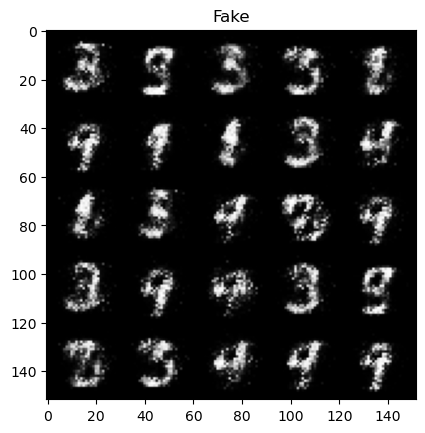

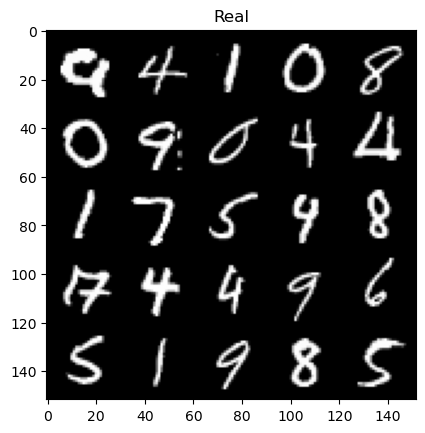

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 20: Generator loss: 4.352369027859621, discriminator loss: 0.04227329266350915


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 21: Generator loss: 4.26464092502716, discriminator loss: 0.050672222568250415


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 22: Generator loss: 4.278105937087459, discriminator loss: 0.05503431962592515


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 23: Generator loss: 4.02265280396191, discriminator loss: 0.06201963833987967


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 24: Generator loss: 3.929973075130601, discriminator loss: 0.07873887241458588


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 25: Generator loss: 4.102906162042354, discriminator loss: 0.07515118272701052


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 26: Generator loss: 4.123249408786993, discriminator loss: 0.07553235953773009


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 27: Generator loss: 4.218857651326194, discriminator loss: 0.06857847298846952


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 28: Generator loss: 4.250379162302403, discriminator loss: 0.06402618006300698


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 29: Generator loss: 4.260861277834439, discriminator loss: 0.07489617429832533


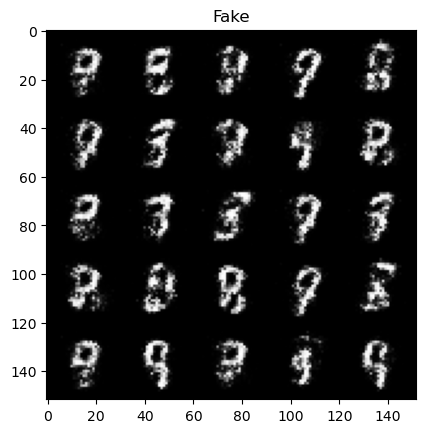

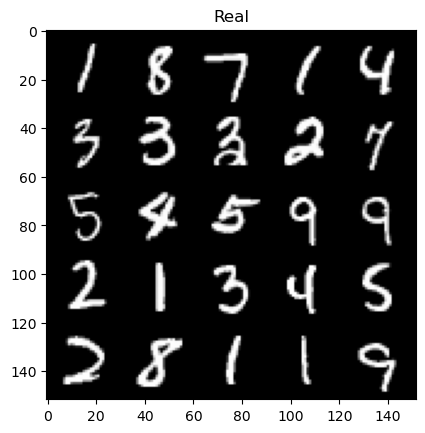

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 30: Generator loss: 4.075987597264207, discriminator loss: 0.0897727769686342


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 31: Generator loss: 4.0555323095463995, discriminator loss: 0.08939279226669625


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 32: Generator loss: 3.8539522863400264, discriminator loss: 0.10607263705591911


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 33: Generator loss: 3.682921076125936, discriminator loss: 0.10175142788302416


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 34: Generator loss: 3.7976258329745294, discriminator loss: 0.09343735496404329


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 35: Generator loss: 3.688172162977109, discriminator loss: 0.11209493060546644


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 36: Generator loss: 3.701700862790984, discriminator loss: 0.11459705926207846


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 37: Generator loss: 3.6343422037706192, discriminator loss: 0.11083026683883372


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 38: Generator loss: 3.4286310713428425, discriminator loss: 0.1340419866764215


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 39: Generator loss: 3.307398430574169, discriminator loss: 0.1405061403317238


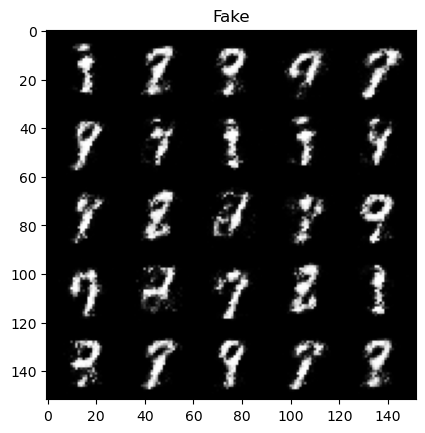

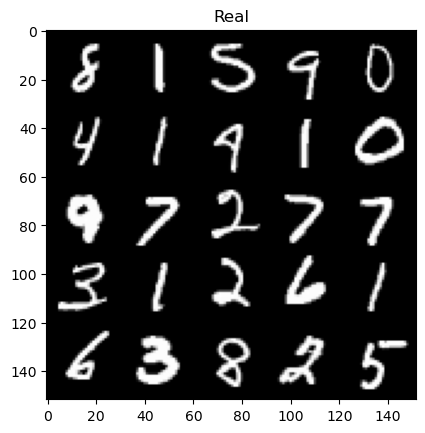

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 40: Generator loss: 3.3351497777235277, discriminator loss: 0.13611287711017422


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 41: Generator loss: 3.4137014753020396, discriminator loss: 0.13678921238064512


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 42: Generator loss: 3.2889628410339355, discriminator loss: 0.14418898130467198


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 43: Generator loss: 3.248456326629053, discriminator loss: 0.14784064177256911


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 44: Generator loss: 3.197083010093998, discriminator loss: 0.14756462090749983


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 45: Generator loss: 3.2615546946332397, discriminator loss: 0.13548801983120853


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 46: Generator loss: 3.377934411136326, discriminator loss: 0.1421153689625421


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 47: Generator loss: 3.046645773499251, discriminator loss: 0.16398347350262377


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 48: Generator loss: 2.8829520450217894, discriminator loss: 0.18871932862791171


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 49: Generator loss: 2.9093855220371725, discriminator loss: 0.18169831799100966


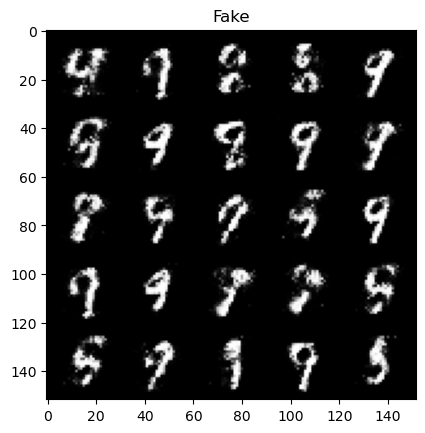

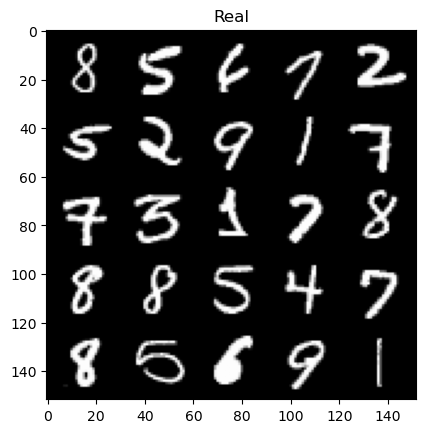

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 50: Generator loss: 2.9319339530554407, discriminator loss: 0.19184935804623277


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 51: Generator loss: 2.7980588626251546, discriminator loss: 0.18820459811862852


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 52: Generator loss: 3.028792236405395, discriminator loss: 0.16149462456070285


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 53: Generator loss: 3.06290582858169, discriminator loss: 0.1719643501584718


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 54: Generator loss: 2.929406114732787, discriminator loss: 0.18590929926331365


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 55: Generator loss: 2.7795910850516767, discriminator loss: 0.19690252910417788


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 56: Generator loss: 2.7543346078665274, discriminator loss: 0.20143676685816697


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 57: Generator loss: 2.7952987303866, discriminator loss: 0.1873924137750414


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 58: Generator loss: 2.767154045959017, discriminator loss: 0.1894771773646127


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 59: Generator loss: 2.761350897583626, discriminator loss: 0.20001157856127347


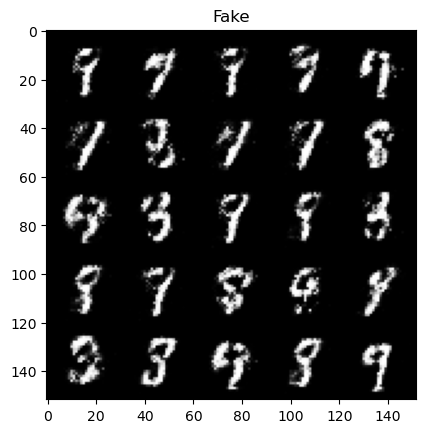

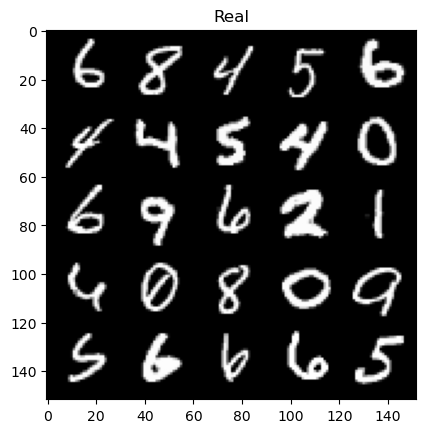

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 60: Generator loss: 2.7241647787439796, discriminator loss: 0.20282424446235078


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 61: Generator loss: 2.5939587392786674, discriminator loss: 0.22204432333074908


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 62: Generator loss: 2.6572569763736684, discriminator loss: 0.21101419043058017


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 63: Generator loss: 2.527126402743081, discriminator loss: 0.23334049536729418


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 64: Generator loss: 2.615303611958713, discriminator loss: 0.21091396474380736


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 65: Generator loss: 2.7755940123153393, discriminator loss: 0.19133890566350556


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 66: Generator loss: 2.6411137347028197, discriminator loss: 0.21737522086990413


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 67: Generator loss: 2.550598845553042, discriminator loss: 0.227476724683603


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 68: Generator loss: 2.5627247707676024, discriminator loss: 0.23169028901977579


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 69: Generator loss: 2.5667084224188508, discriminator loss: 0.21945203754947637


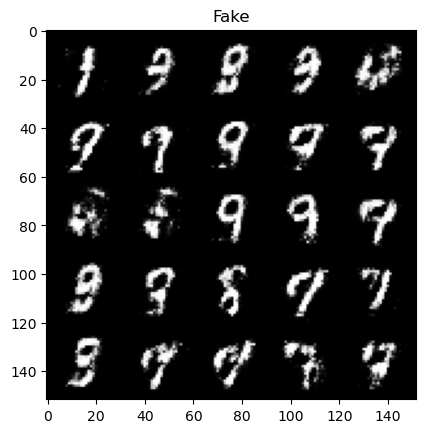

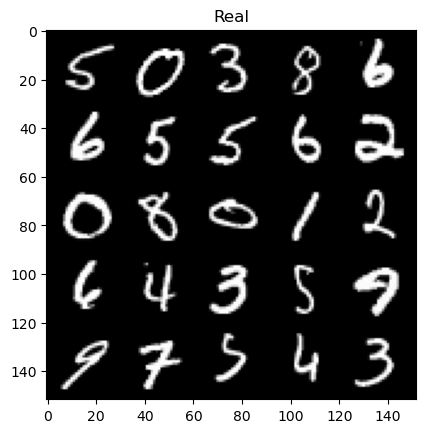

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 70: Generator loss: 2.5289842248725485, discriminator loss: 0.21579898496680677


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 71: Generator loss: 2.519741543066273, discriminator loss: 0.23345886485408873


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 72: Generator loss: 2.555409039515676, discriminator loss: 0.2157627137771039


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 73: Generator loss: 2.4778517751551385, discriminator loss: 0.23200174200255225


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 74: Generator loss: 2.4599993350917595, discriminator loss: 0.23383341183159143


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 75: Generator loss: 2.4266122043259872, discriminator loss: 0.24417569766293712


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 76: Generator loss: 2.5932534376441287, discriminator loss: 0.21245806284550664


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 77: Generator loss: 2.3987069206197122, discriminator loss: 0.25381602296061606


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 78: Generator loss: 2.4073396743233526, discriminator loss: 0.2437889939432205


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 79: Generator loss: 2.3902378616048328, discriminator loss: 0.23731296784333836


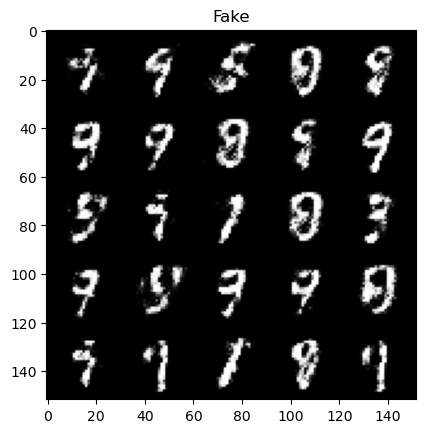

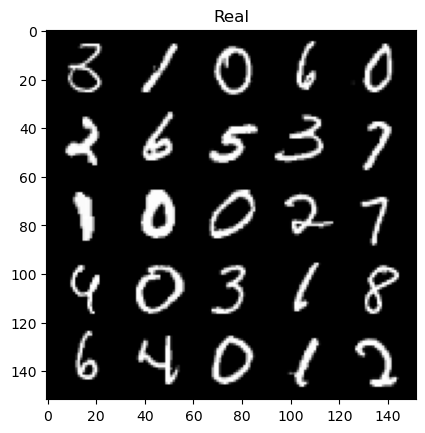

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 80: Generator loss: 2.349334541414338, discriminator loss: 0.259933588156568


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 81: Generator loss: 2.3293869447098103, discriminator loss: 0.25533339231888624


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 82: Generator loss: 2.2555460708736104, discriminator loss: 0.2732877136547682


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 83: Generator loss: 2.1164864398269003, discriminator loss: 0.29811956547597834


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 84: Generator loss: 2.1640066589627946, discriminator loss: 0.2868354561994833


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 85: Generator loss: 2.1782760015174523, discriminator loss: 0.2752846045725381


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 86: Generator loss: 2.297618032010125, discriminator loss: 0.25962880736729227


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 87: Generator loss: 2.2740746906825473, discriminator loss: 0.2686404451759639


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 88: Generator loss: 2.236792936508081, discriminator loss: 0.27333311368026203


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 89: Generator loss: 2.087741412841943, discriminator loss: 0.3195201463536667


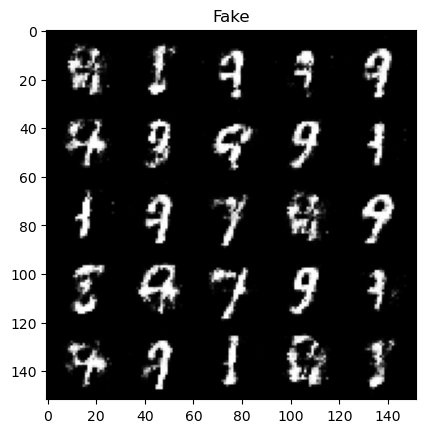

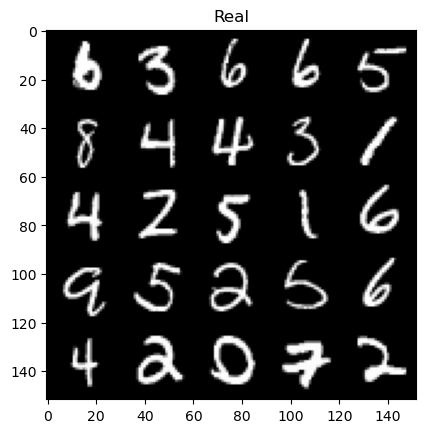

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 90: Generator loss: 2.1231363465282707, discriminator loss: 0.29018907779569564


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 91: Generator loss: 2.1272273256834637, discriminator loss: 0.2871140488175187


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 92: Generator loss: 2.05818507208753, discriminator loss: 0.30724949095803283


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 93: Generator loss: 2.1197444609741667, discriminator loss: 0.2875622517264474


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 94: Generator loss: 2.0964085097506104, discriminator loss: 0.28571664451408996


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 95: Generator loss: 2.1754632339294533, discriminator loss: 0.2787481257274969


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 96: Generator loss: 2.088797256636467, discriminator loss: 0.29801243572219854


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 97: Generator loss: 2.139898069631825, discriminator loss: 0.28055115345952863


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 98: Generator loss: 2.089117746109139, discriminator loss: 0.29832356853652864


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 99: Generator loss: 1.9144340623924727, discriminator loss: 0.32918339437131944


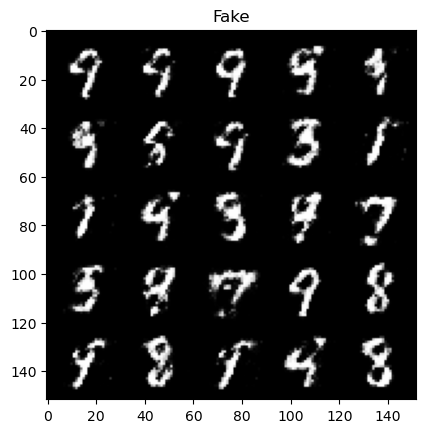

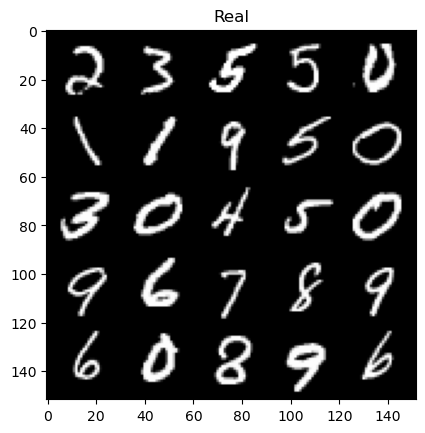

In [8]:
clear_output()
num_epochs = 100

for epoch in range(num_epochs):
    sum_gen_loss = 0
    sum_disc_loss = 0
    cur_step = 0

    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)
        real = real.view(cur_batch_size, -1).to(device)
        
        disc_opt.zero_grad()
        disc_loss = get_disc_loss(gen, disc, criterion, real, cur_batch_size, n_dim, device)
        disc_loss.backward(retain_graph=True)
        disc_opt.step()

        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, n_dim, device)
        gen_loss.backward(retain_graph=True)
        gen_opt.step()

        sum_disc_loss += disc_loss.item() 
        sum_gen_loss += gen_loss.item() 

        cur_step += 1


    
    mean_disc_loss = sum_disc_loss/cur_step
    mean_gen_loss = sum_gen_loss/cur_step
    print(f"Epoch {epoch}: Generator loss: {mean_gen_loss}, discriminator loss: {mean_disc_loss}")
    
    epoch_step+=1
    if epoch_step % 10 ==0 :
        fake_noise = get_noise(cur_batch_size, n_dim, device=device)
        fake = gen(fake_noise)
        
        show_tensor_images(fake, title='Fake')
        show_tensor_images(real, title='Real')
